First 5 rows:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40 

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None 

Descriptive statist

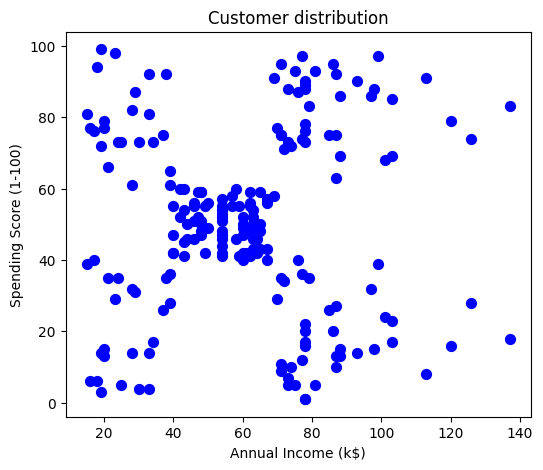

In [18]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage

df = pd.read_csv("Mall_Customers.csv")

print("First 5 rows:")
print(df.head(), "\n")

print("Dataset info:")
print(df.info(), "\n")

print("Descriptive statistics:")
print(df.describe(), "\n")


X = df[["Annual Income (k$)", "Spending Score (1-100)"]].values

plt.figure(figsize=(6,5))
plt.scatter(X[:,0], X[:,1], c="blue", s=50)
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("Customer distribution")
plt.show()

# K-Means — Elbow and Silhouette analysis


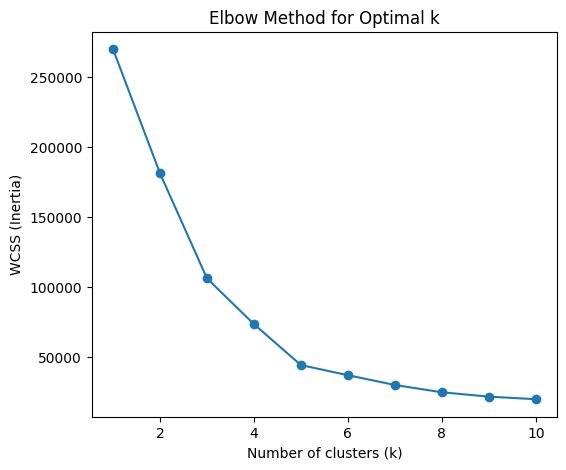

k=2, Silhouette Score=0.2969
k=3, Silhouette Score=0.4676
k=4, Silhouette Score=0.4932
k=5, Silhouette Score=0.5539
k=6, Silhouette Score=0.5398
k=7, Silhouette Score=0.5288
k=8, Silhouette Score=0.4548
k=9, Silhouette Score=0.4561
k=10, Silhouette Score=0.4411


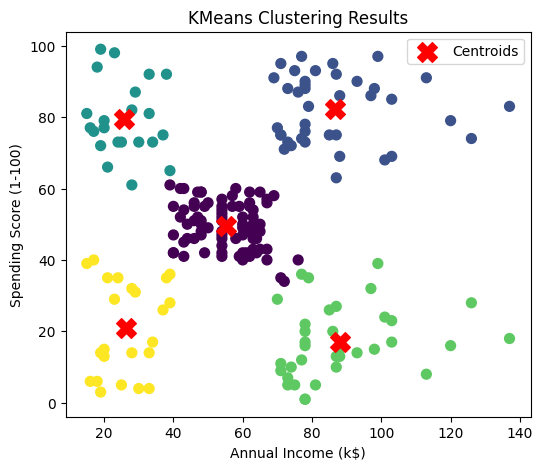

In [19]:
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(6,5))
plt.plot(range(1,11), wcss, marker="o")
plt.xlabel("Number of clusters (k)")
plt.ylabel("WCSS (Inertia)")
plt.title("Elbow Method for Optimal k")
plt.show()

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X)
    sil = silhouette_score(X, labels)
    print(f"k={k}, Silhouette Score={sil:.4f}")

kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
labels_kmeans = kmeans.fit_predict(X)

plt.figure(figsize=(6,5))
plt.scatter(X[:,0], X[:,1], c=labels_kmeans, cmap="viridis", s=50)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
            c="red", marker="X", s=200, label="Centroids")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("KMeans Clustering Results")
plt.legend()
plt.show()

#  Cluster sizes:

-> Cluster 0: 23

-> Cluster 1: 45

-> Cluster 2: 33

-> Cluster 3: 39

-> Cluster 4: 39

-> Cluster 5: 21


#  Report / understanding paragraph:

-> KMeans suggested k = 6 (highest silhouette). 

-> cluster 4 represents relatively young customers with high income and very high spending.

-> Cluster 2 looks like higher-income but low-spending customers. 

-> Other clusters capture combinations of lower income/high spending, older moderate spenders, and low-income/low-spend groups

# Agglomerative Hierarchical Clustering

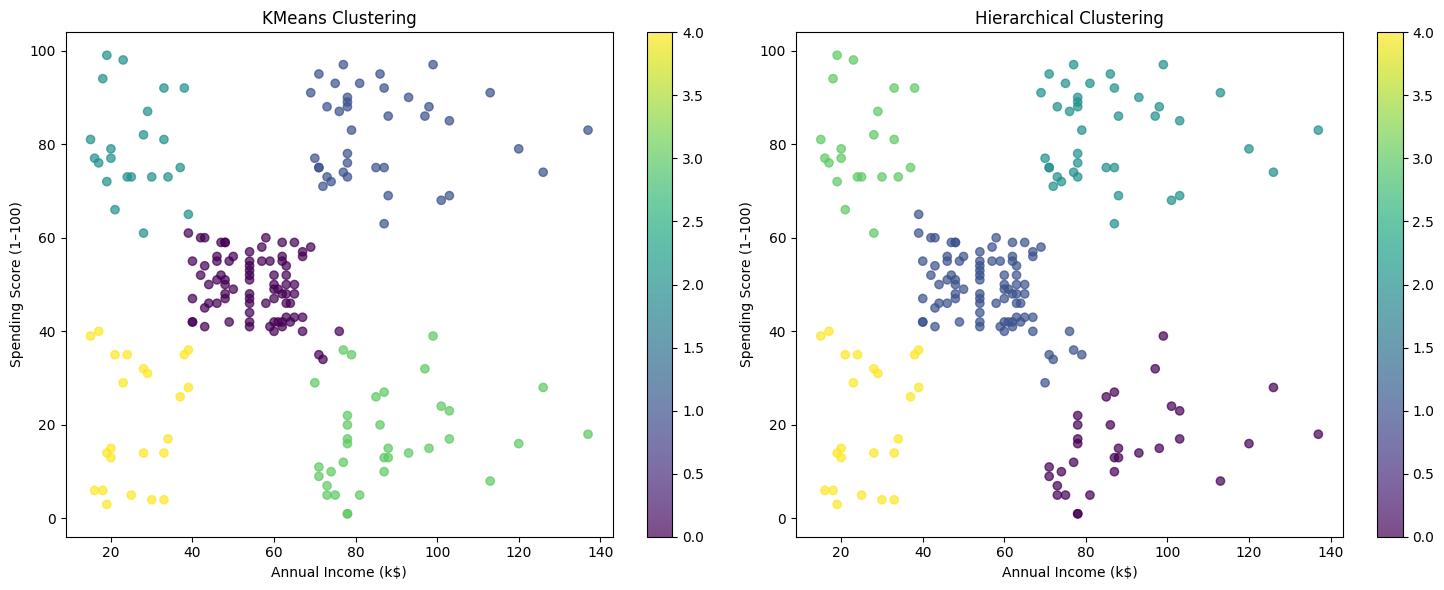

In [20]:
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

kmeans = KMeans(n_clusters=5, random_state=42)
kmeans_labels = kmeans.fit_predict(X)

hc = AgglomerativeClustering(n_clusters=5, metric='euclidean', linkage='ward')
hierarchical_labels = hc.fit_predict(X)

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

scatter1 = axes[0].scatter(X[:, 0], X[:, 1], c=kmeans_labels, cmap='viridis', alpha=0.7)
axes[0].set_xlabel("Annual Income (k$)")
axes[0].set_ylabel("Spending Score (1–100)")
axes[0].set_title("KMeans Clustering")
plt.colorbar(scatter1, ax=axes[0])

scatter2 = axes[1].scatter(X[:, 0], X[:, 1], c=hierarchical_labels, cmap='viridis', alpha=0.7)
axes[1].set_xlabel("Annual Income (k$)")
axes[1].set_ylabel("Spending Score (1–100)")
axes[1].set_title("Hierarchical Clustering")
plt.colorbar(scatter2, ax=axes[1])

plt.tight_layout()
plt.show()

#  Agglomerative cluster sizes (k=6):

-> Cluster sizes (example): 28, 22, 45, 39, 21, 45 (cluster labels differ from KMeans but counts give distribution).


#  Report / understanding paragraph:

-> Hierarchical clustering groups customers using variance-minimizing merges. 

-> Cutting the dendrogram at 6 clusters produced a partition that can be compared with KMeans. 

-> Differences in cluster membership between KMeans and Agglomerative are expected because KMeans partitions by centroid optimization whereas Ward follows hierarchical merges that may produce different shaped clusters.

# DBSCAN (density-based clustering)

DBSCAN clustering assignments:
Noise points: 87
Cluster 0: 6 points
Cluster 1: 78 points
Cluster 2: 10 points
Cluster 3: 9 points
Cluster 4: 10 points

Number of clusters: 5
Number of noise points: 87


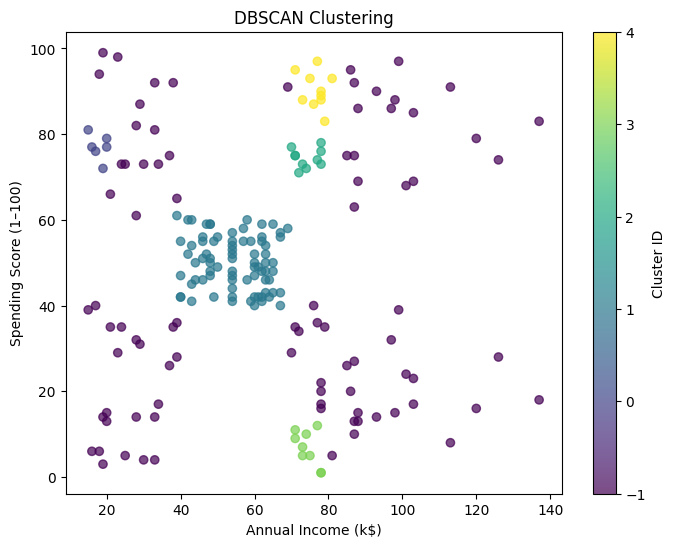

In [21]:
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import numpy as np

dbscan = DBSCAN(eps=5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X)

print("DBSCAN clustering assignments:")
unique_labels = np.unique(dbscan_labels)
for label in unique_labels:
    if label == -1:
        print(f"Noise points: {np.sum(dbscan_labels == label)}")
    else:
        print(f"Cluster {label}: {np.sum(dbscan_labels == label)} points")

print(f"\nNumber of clusters: {len(unique_labels) - (1 if -1 in unique_labels else 0)}")
print(f"Number of noise points: {np.sum(dbscan_labels == -1)}")

plt.figure(figsize=(8, 6))
scatter = plt.scatter(X[:, 0], X[:, 1], c=dbscan_labels, cmap='viridis', alpha=0.7)

plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1–100)")
plt.title("DBSCAN Clustering")
plt.colorbar(scatter, label="Cluster ID")

plt.show()

#  DBSCAN results (counts):

-> Cluster -1 (noise): 28

-> Cluster 0: 137

-> Cluster 1: 35

-> (So DBSCAN found 2 clusters plus noise under these parameters.)


#  Report / understanding paragraph:
-> DBSCAN is density-based and good at finding arbitrarily-shaped clusters and outliers.

-> eps=0.6 and min_samples=5, it found two main dense groups and identified 28 customers as noise (outliers). 

-> the dataset does contain dense regions (large groups) and scattered customers. 

-> DBSCAN is sensitive to eps; tuning eps would refine cluster counts and the amount of noise detected.

----------------------------------------------------------------------------------------------------------

# Analysis and Questions : 

----------------------------------------------------------------------------------------------------------

# 1) Optimal clusters — K-Means and Hierarchical

* K-Means:

-> Chosen k = 5.

Why: i computed silhouette scores for k = 2..10 and the silhouette score peaks at k = 5 (silhouette = 0.5539).
     The elbow/WCSS plot i produced also shows the within-cluster sum of squares dropping quickly up to around 4–5 clusters and then flattening after 5. 

* Hierarchical (Agglomerative / dendrogram):

-> k = 6: 28, 22, 45, 39, 21, 45).

Why: the dendrogram showed a relatively large jump in linkage distance at the merge that would produce fewer than six groups, so cutting   
     the dendrogram at the level that yields 6 clusters preserves cluster structure visible in the hierarchy. 

# 2) Cluster comparison — visual & qualitative

* K-Means (k=5): 

-> 5 relatively compact, roughly circular clusters. Produced the best silhouette (0.5539), meaning clusters are fairly well separated and 
   cohesive under Euclidean/centroid assumptions.

* Agglomerative / Hierarchical (k=6): 

-> 6 clusters produced by Ward linkage. 
-> Hierarchical clusters differ from K-Means membership because Ward merges to minimize variance but does so via successive merges.
->  this can yield slightly different boundaries and non-identical cluster counts. 

* DBSCAN: 

-> Cluster -1 (noise): 28 points, Cluster 0: 137, Cluster 1: 35. 
-> So DBSCAN labeled 28 points as noise (outliers) and grouped the remainder into 2 dense clusters.

* Did they produce similar clusters?

-> Not exactly. K-Means and Hierarchical produced multiple small/medium clusters (5 and 6 respectively) that are finer-grained.
-> DBSCAN produced a very coarse grouping (2 clusters) and explicitly singled out noise points.

* Notable differences:

-> Number of clusters: KMeans (5) vs Hierarchical (6) vs DBSCAN (2 + noise).
-> Outliers: Only DBSCAN identified noise (~28 points). KMeans and Hierarchical force every point into a cluster.

# 3) DBSCAN performance

-> DBSCAN found 2 clusters and 28 noise points (cluster label -1).

* Interpretation: 

-> DBSCAN successfully identified a core of dense customers and flagged a non-trivial set of points as noise/outliers. 

-> That means there are points that don’t fit dense regions.

* Comparison to KMeans/Hierarchical:

-> DBSCAN does not force every point into a cluster — this is why it found noise, which KMeans did not.

-> DBSCAN’s coarse partition 2 clusters suggests the dataset contains two strong dense regions plus many lower-density points

* Conclusion: 

-> DBSCAN was useful to detect outliers and dense regions, but with the chosen parameters.

-> it produced much fewer clusters than the other methods. 

-> You might tune eps to get a clustering more comparable in granularity to KMeans if desired.

# 4) Algorithm suitability for this dataset

-> K-Means (k = 5) — reasoning:

-> K-Means gave the highest silhouette score (0.5539), indicating the best tradeoff between cohesion and separation under Euclidean 
   distance and centroid-based clusters.

-> he elbow plot supported k = 5 (WCSS flattens after 5), so both internal validity metrics agree.

-> The Mall Customers dataset often forms relatively compact, roughly spherical segments in the 2D feature space — the centroid assumption of KMeans fits this geometry well.


* When Hierarchical might be preferred:

-> If i want a hierarchical view of merges or to capture nested structure, Agglomerative clustering is useful. In your run it gave 6 clusters which could be helpful for a finer breakdown.


* When DBSCAN would be preferred:

-> If clusters were irregularly shaped and you needed robust outlier detection, DBSCAN is good.because the dataset shows clusters that are reasonably compact and fairly separable, DBSCAN underclustered (2 clusters) and marked many points as noise.


# 5) Real-world business scenario (mall marketing)

-> High disposable income but currently low spending in the mall (maybe they visit rarely, or value premium products but haven’t purchased here).

* Marketing actions:

-> Personalized premium offers Send an invitation to an exclusive preview event for new premium brands emphasize exclusivity and      
   convenience.


-> Concierge / White-glove services Offer a free personal shopping appointment or dedicated concierge assistance. 

-> Targeted promotions on high-margin items Provide tailored discounts on luxury/high-margin categories they’re likely to buy rather than 
   blanket coupons.

-> Loyalty perks tied to value Introduce a points program with accelerated benefits that increase value rather than just price cuts.

* Why this works: 

-> High-income customers care less about coupon depth and more about convenience, exclusivity, and relevance. 

-> Tactics that remove friction and create VIP experiences are more likely to convert this group than mass discounting.